# Ordinary differential equation solver

In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
def RSP_solver(t, P, x0):

    def RSP(x, t, P):
        r = x[0]
        Pr = P[0]
        s = x[1]
        Ps = P[1]
        p = x[2]
        Pp = P[2]

        drdt = r*(s*Pr - p*Pp)
        dsdt = s*(p*Ps - r*Pr)
        dpdt = p*(r*Pr - s*Ps)
        return [drdt, dsdt, dpdt]

    y = odeint(RSP, x0, t, args=(P,)) 
    return pd.DataFrame(y, columns=['$n_r$', '$n_s$', '$n_p$'])

def RSP_model(t, Pr, Ps, Pp, nr_init, ns_init, np_init):
    P = [Pr, Ps, Pp]
    x0 = [nr_init, ns_init, np_init]
    s = RSP_solver(t, P, x0)
    return s

<Axes: >

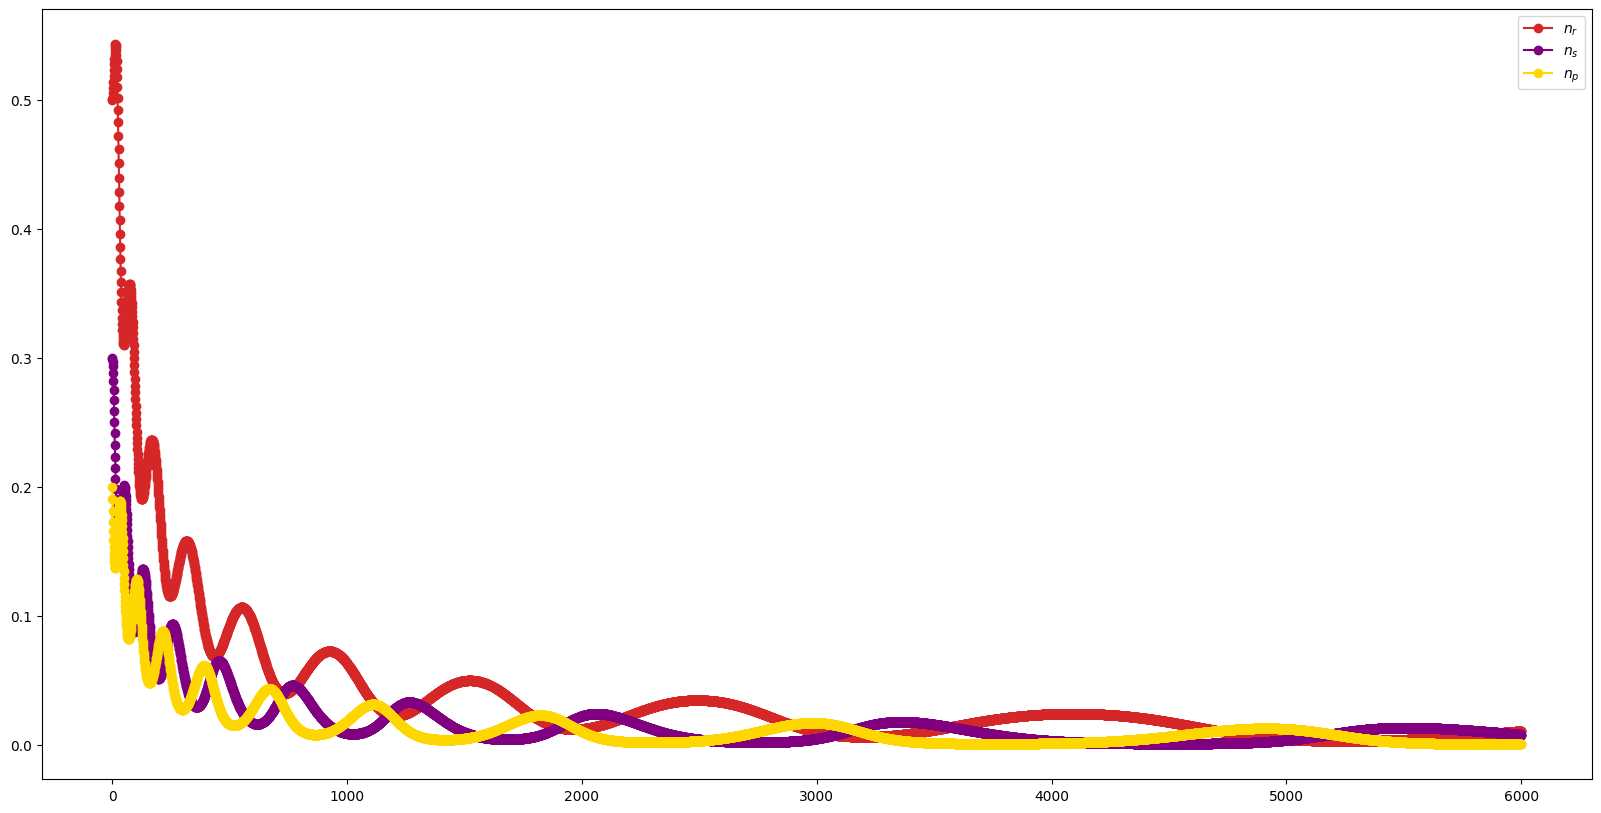

In [3]:
t_start = 0
t_end = 6000
t = np.linspace(t_start, t_end, t_end-t_start+1)
Pr = 0.2
Ps = 0.5
Pp = 0.3
nr_init = 0.5
ns_init = 0.3
np_init = 0.2
results_df = RSP_model(t, Pr=Pr, Ps=Ps, Pp=Pp, nr_init=nr_init, ns_init=ns_init, np_init=np_init)
results_df.plot(figsize=(20,10), style='-o', color=['tab:red', 'purple', 'gold'])

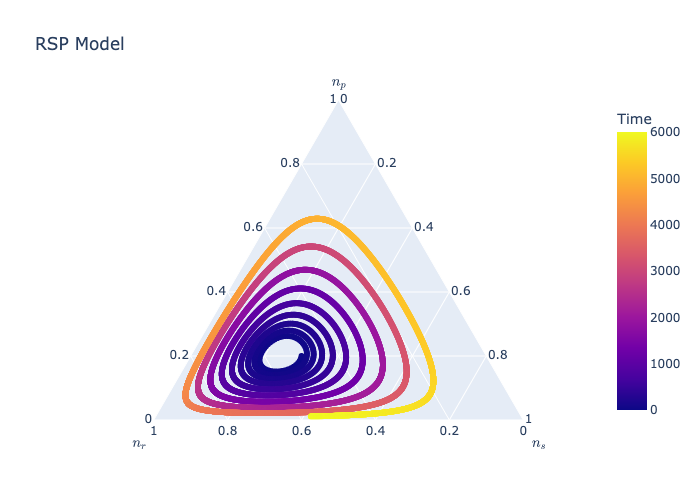

In [4]:
fig = px.scatter_ternary(
    results_df,
    a='$n_p$',
    b='$n_r$',
    c='$n_s$',
    color=results_df.index,
    size_max=10,
    title="RSP Model"
    )
fig.update_traces(mode='lines+markers', line=dict(color='black'))
fig.update_layout(coloraxis_colorbar=dict(title='Time'))
fig.show('png')

<Axes: >

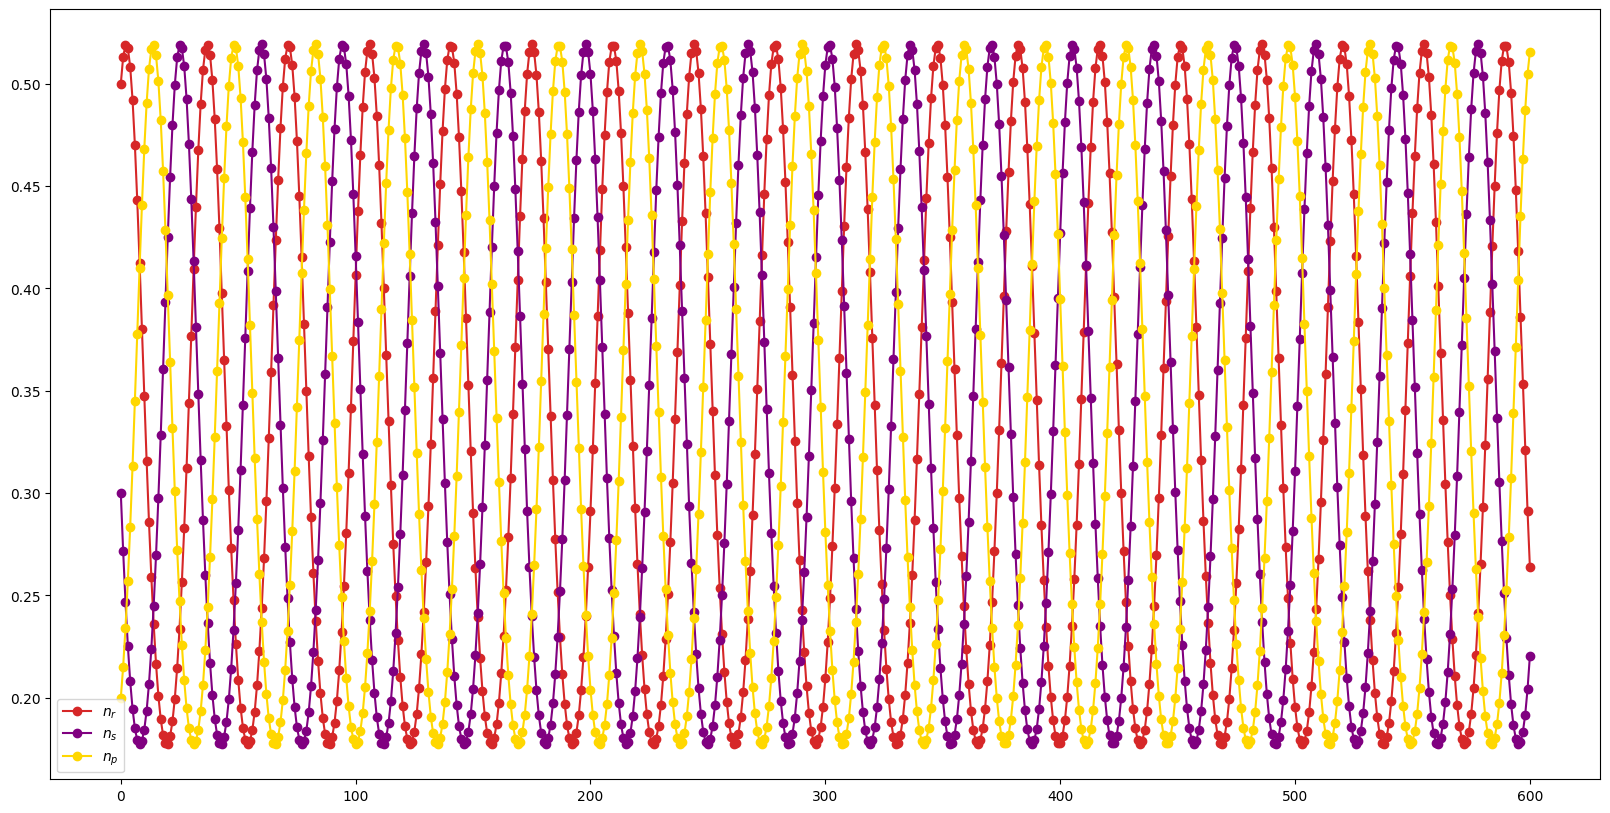

In [5]:
# equilibrium
t_start = 0
t_end = 600
t = np.linspace(t_start, t_end, t_end-t_start+1)
Pr = 0.33
Ps = 0.33
Pp = 0.33
nr_init = 0.5
ns_init = 0.3
np_init = 0.2
results_33_df = RSP_model(t, Pr=Pr, Ps=Ps, Pp=Pp, nr_init=nr_init, ns_init=ns_init, np_init=np_init)
results_33_df.plot(figsize=(20,10), style='-o', color=['tab:red', 'purple', 'gold'])

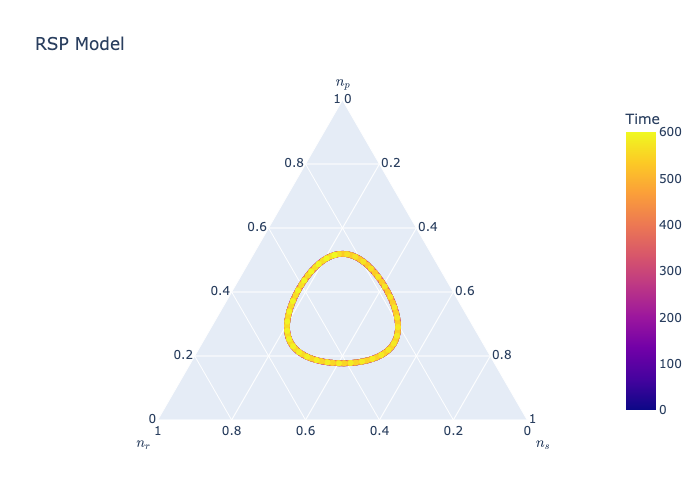

In [6]:
fig = px.scatter_ternary(
    results_33_df,
    a='$n_p$',
    b='$n_r$',
    c='$n_s$',
    color=results_33_df.index,
    size_max=10,
    title="RSP Model"
    )
fig.update_traces(mode='lines+markers', line=dict(color='black'))
fig.update_layout(coloraxis_colorbar=dict(title='Time'))
fig.show('png')

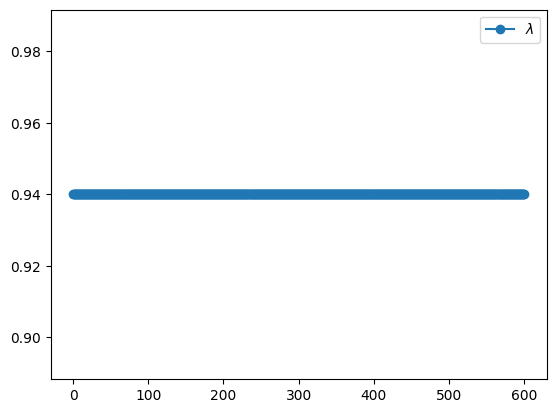

In [8]:
results_33_df['lambda'] = (results_33_df['$n_r$']/Ps)**Ps*(results_33_df['$n_s$']/Pp)**Pp*(results_33_df['$n_p$']/Pr)**Pr
results_33_df['lambda'].apply(lambda x: round(x, 2)).plot(y='lambda', style='-o', label='$\lambda$')
plt.legend()

<Axes: >

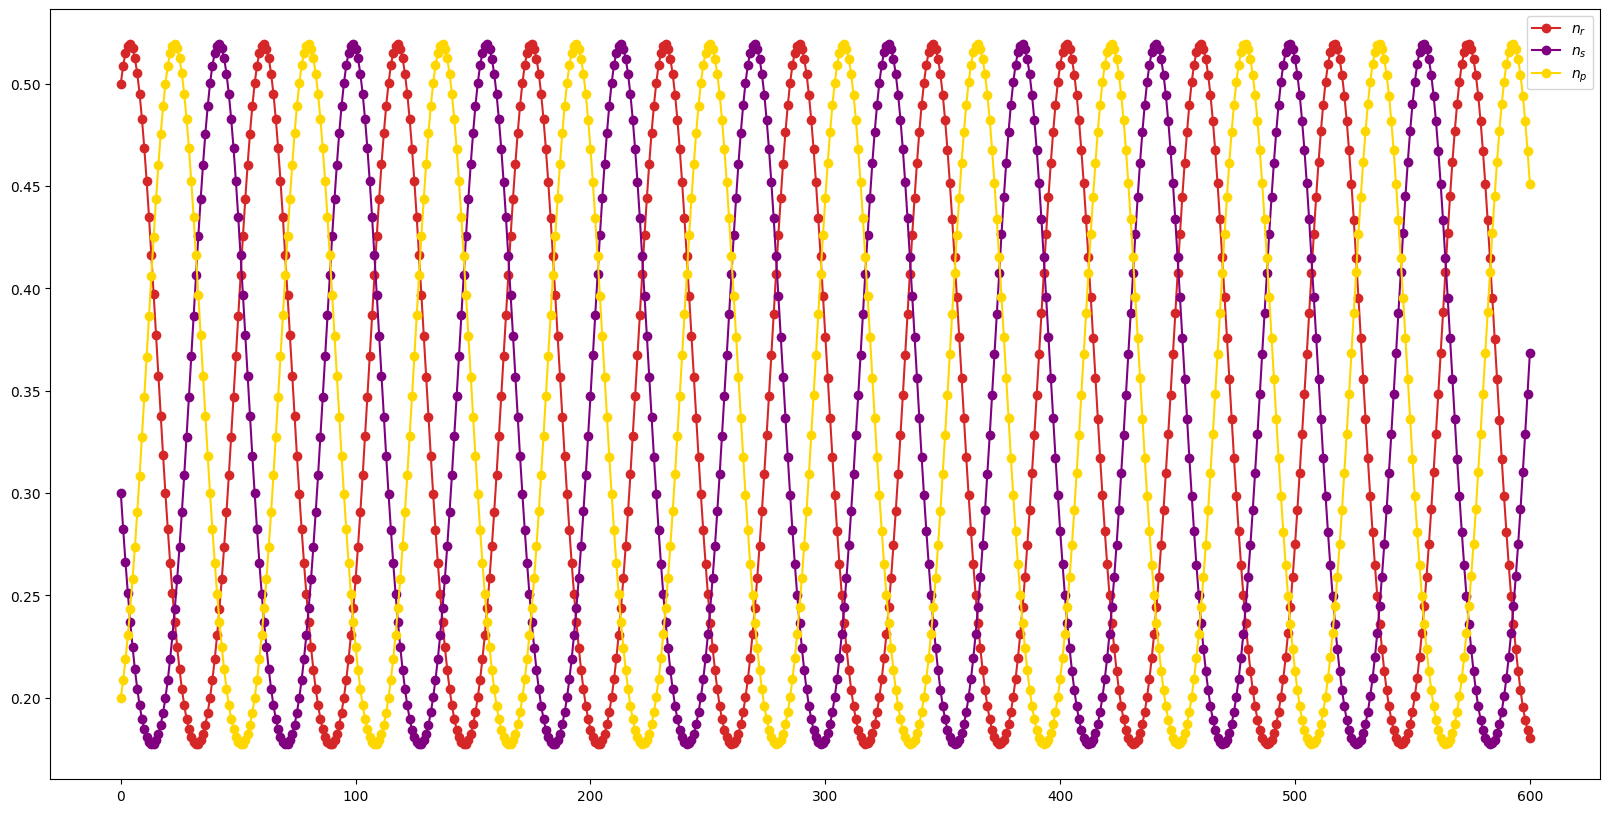

In [9]:
# equilibrium
t_start = 0
t_end = 600
t = np.linspace(t_start, t_end, t_end-t_start+1)
Pr = 0.2
Ps = 0.2
Pp = 0.2
nr_init = 0.5
ns_init = 0.3
np_init = 0.2
results_20_df = RSP_model(t, Pr=Pr, Ps=Ps, Pp=Pp, nr_init=nr_init, ns_init=ns_init, np_init=np_init)
results_20_df.plot(figsize=(20,10), style='-o', color=['tab:red', 'purple', 'gold'])

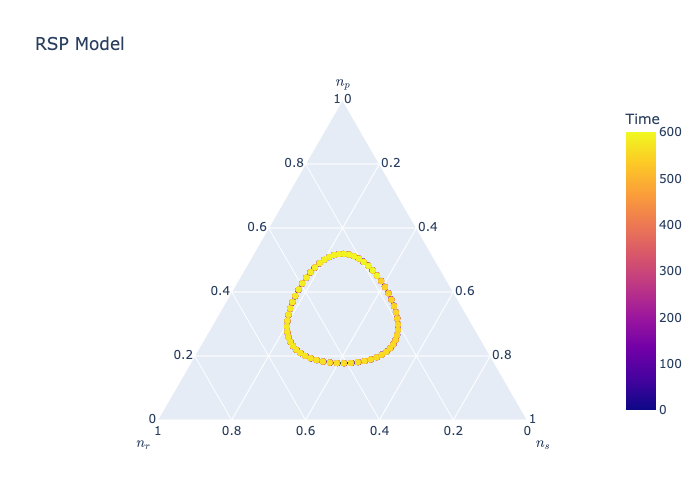

In [10]:
fig = px.scatter_ternary(
    results_20_df,
    a='$n_p$',
    b='$n_r$',
    c='$n_s$',
    color=results_20_df.index,
    size_max=10,
    title="RSP Model"
    )
fig.update_traces(mode='lines+markers', line=dict(color='black'))
fig.update_layout(coloraxis_colorbar=dict(title='Time'))
fig.show('png')

<Axes: >

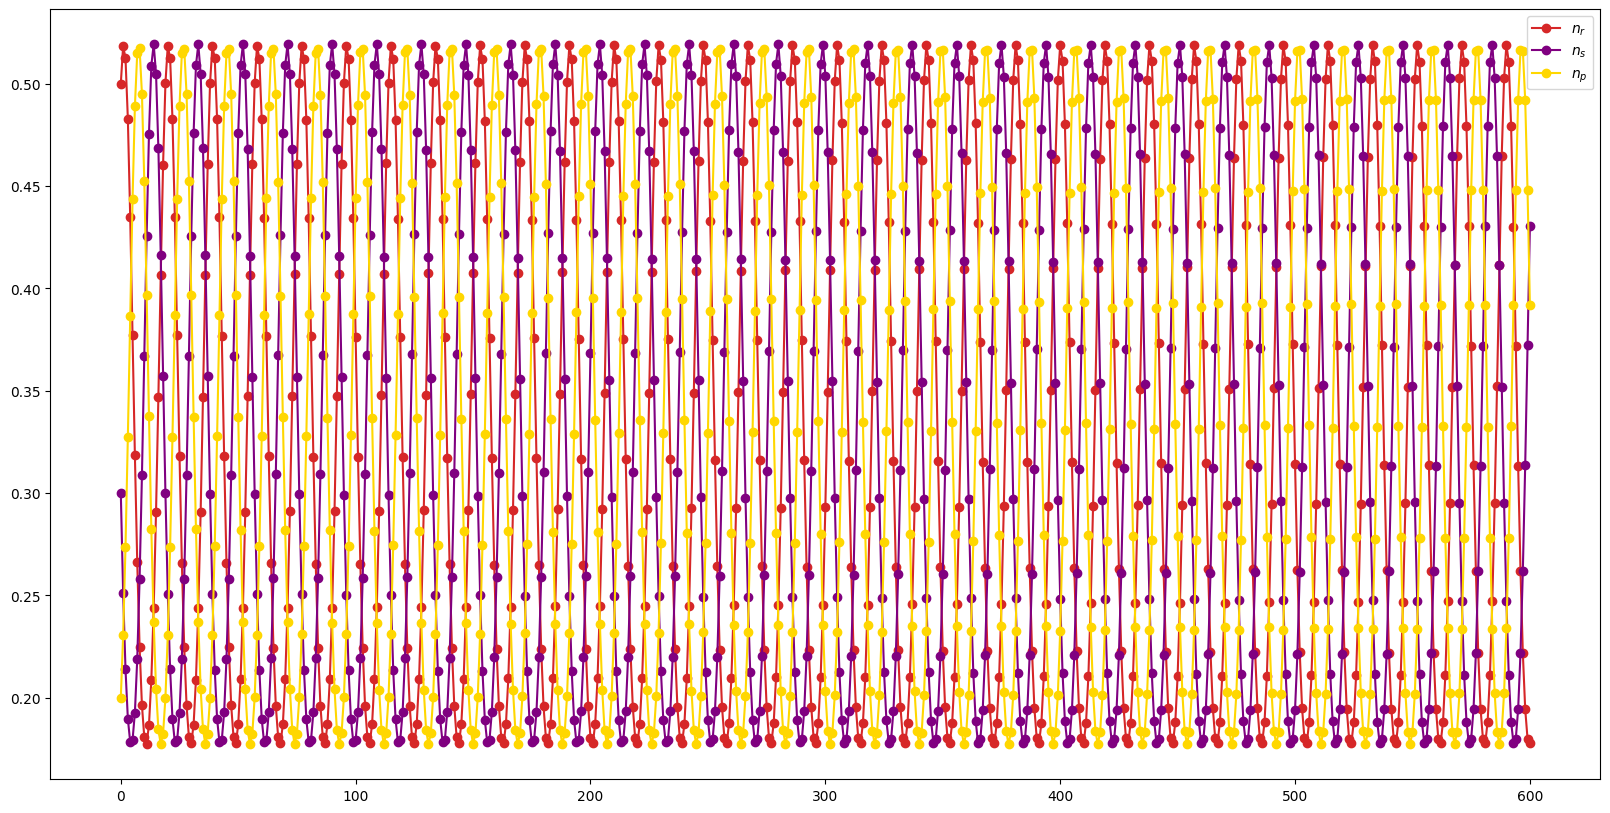

In [11]:
# equilibrium
t_start = 0
t_end = 600
t = np.linspace(t_start, t_end, t_end-t_start+1)
Pr = 0.6
Ps = 0.6
Pp = 0.6
nr_init = 0.5
ns_init = 0.3
np_init = 0.2
results_60_df = RSP_model(t, Pr=Pr, Ps=Ps, Pp=Pp, nr_init=nr_init, ns_init=ns_init, np_init=np_init)
results_60_df.plot(figsize=(20,10), style='-o', color=['tab:red', 'purple', 'gold'])

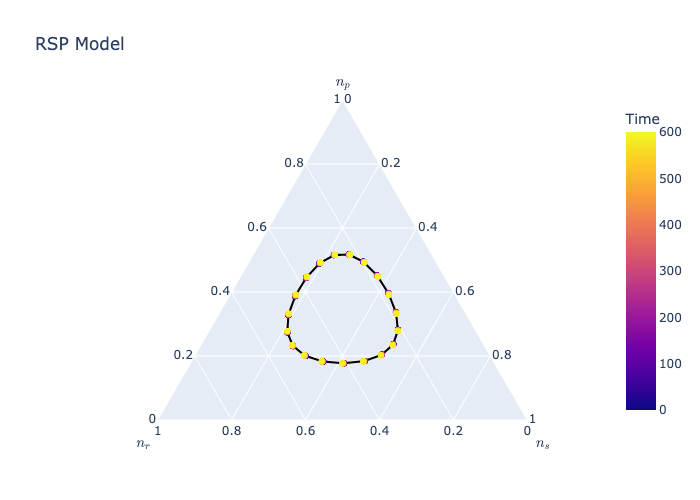

In [12]:
fig = px.scatter_ternary(
    results_60_df,
    a='$n_p$',
    b='$n_r$',
    c='$n_s$',
    color=results_60_df.index,
    size_max=10,
    title="RSP Model"
    )
fig.update_traces(mode='lines+markers', line=dict(color='black'))
fig.update_layout(coloraxis_colorbar=dict(title='Time'))
fig.show('png')